# Linear Regression and Temperature

In this notebook, we'll look at using linear regression to study changes in temperature.

## Setup

In [1]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

%config InlineBackend.figure_format ='retina'

## Getting our data

We'll be getting data from [North America Land Data Assimilation System (NLDAS)](https://wonder.cdc.gov/NASA-NLDAS.html), which provides the daily average temperature from 1979-2011 for the United States.

For the next step, you will need to choose some settings in the data request form. These are:

- GroupBy: Month Day, Year
- Your State
- Export Results (check box)
- Show Zero Values (check box)

>1) Download the data for your home state (or state of your choosing) and upload it to M2 in your work directory.

# Loading our data

In [2]:
df = pd.read_csv('North America Land Data Assimilation System (NLDAS) Daily Air Temperatures and Heat Index (1979-2011).txt',delimiter='\t',skipfooter=14,engine='python')

In [3]:
df

,Notes,"Month Day, Year","Month Day, Year Code",Avg Daily Max Air Temperature (F)
0,NaN,"Jan 01, 1979",1979/01/01,44.57
1,NaN,"Jan 02, 1979",1979/01/02,49.24
2,NaN,"Jan 03, 1979",1979/01/03,52.43
3,NaN,"Jan 04, 1979",1979/01/04,52.30
4,NaN,"Jan 05, 1979",1979/01/05,47.61
...,...,...,...,...
12049,NaN,"Dec 28, 2011",2011/12/28,57.00
12050,NaN,"Dec 29, 2011",2011/12/29,59.48
12051,NaN,"Dec 30, 2011",2011/12/30,57.24
12052,NaN,"Dec 31, 2011",2011/12/31,57.50


### Clean the data

>2) Drop any rows that have the value "Total" in the Notes column, then drop the Notes column

In [4]:
df = df[df.Notes != 'Total']

In [5]:
df
df.drop(df.columns[df.apply(lambda col: col.isnull().sum() > 3)], axis=1)

,"Month Day, Year","Month Day, Year Code",Avg Daily Max Air Temperature (F)
0,"Jan 01, 1979",1979/01/01,44.57
1,"Jan 02, 1979",1979/01/02,49.24
2,"Jan 03, 1979",1979/01/03,52.43
3,"Jan 04, 1979",1979/01/04,52.30
4,"Jan 05, 1979",1979/01/05,47.61
...,...,...,...
12048,"Dec 27, 2011",2011/12/27,54.34
12049,"Dec 28, 2011",2011/12/28,57.00
12050,"Dec 29, 2011",2011/12/29,59.48
12051,"Dec 30, 2011",2011/12/30,57.24


>3) Make a column called Date that is in the pandas datetime format

In [6]:
df['Date'] = pd.to_datetime(df['Month Day, Year'])

/tmp/ipykernel_18670/422642348.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Date'] = pd.to_datetime(df['Month Day, Year'])


>4) Make columns for 'Year', 'Month', and 'Day' by splitting the column 'Month Day, Year'

In [7]:
df.head()

,Notes,"Month Day, Year","Month Day, Year Code",Avg Daily Max Air Temperature (F),Date
0,NaN,"Jan 01, 1979",1979/01/01,44.57,1979-01-01
1,NaN,"Jan 02, 1979",1979/01/02,49.24,1979-01-02
2,NaN,"Jan 03, 1979",1979/01/03,52.43,1979-01-03
3,NaN,"Jan 04, 1979",1979/01/04,52.30,1979-01-04
4,NaN,"Jan 05, 1979",1979/01/05,47.61,1979-01-05


In [8]:
df["Day"] = df['Date'].map(lambda x: x.day)
df["Month"] = df['Date'].map(lambda x: x.month)
df["Year"] = df['Date'].map(lambda x: x.year)
df

/tmp/ipykernel_18670/882610647.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["Day"] = df['Date'].map(lambda x: x.day)
/tmp/ipykernel_18670/882610647.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["Month"] = df['Date'].map(lambda x: x.month)
/tmp/ipykernel_18670/882610647.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pand

,Notes,"Month Day, Year","Month Day, Year Code",Avg Daily Max Air Temperature (F),Date,Day,Month,Year
0,NaN,"Jan 01, 1979",1979/01/01,44.57,1979-01-01,1,1,1979
1,NaN,"Jan 02, 1979",1979/01/02,49.24,1979-01-02,2,1,1979
2,NaN,"Jan 03, 1979",1979/01/03,52.43,1979-01-03,3,1,1979
3,NaN,"Jan 04, 1979",1979/01/04,52.30,1979-01-04,4,1,1979
4,NaN,"Jan 05, 1979",1979/01/05,47.61,1979-01-05,5,1,1979
...,...,...,...,...,...,...,...,...
12048,NaN,"Dec 27, 2011",2011/12/27,54.34,2011-12-27,27,12,2011
12049,NaN,"Dec 28, 2011",2011/12/28,57.00,2011-12-28,28,12,2011
12050,NaN,"Dec 29, 2011",2011/12/29,59.48,2011-12-29,29,12,2011
12051,NaN,"Dec 30, 2011",2011/12/30,57.24,2011-12-30,30,12,2011


In [9]:

df['DateInt'] = df['Date'].astype(int)/10e10 # This will be used later

/tmp/ipykernel_18670/1714370516.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['DateInt'] = df['Date'].astype(int)/10e10 # This will be used later


## Generating a scatter plot

> 4) Use df.plot.scatter to plot 'Date' vs 'Avg Daily Max Air Temperature (F)'. You might want to add figsize=(50,5) as an argument to make it more clear what is happening.

<AxesSubplot:xlabel='Date', ylabel='Avg Daily Max Air Temperature (F)'>

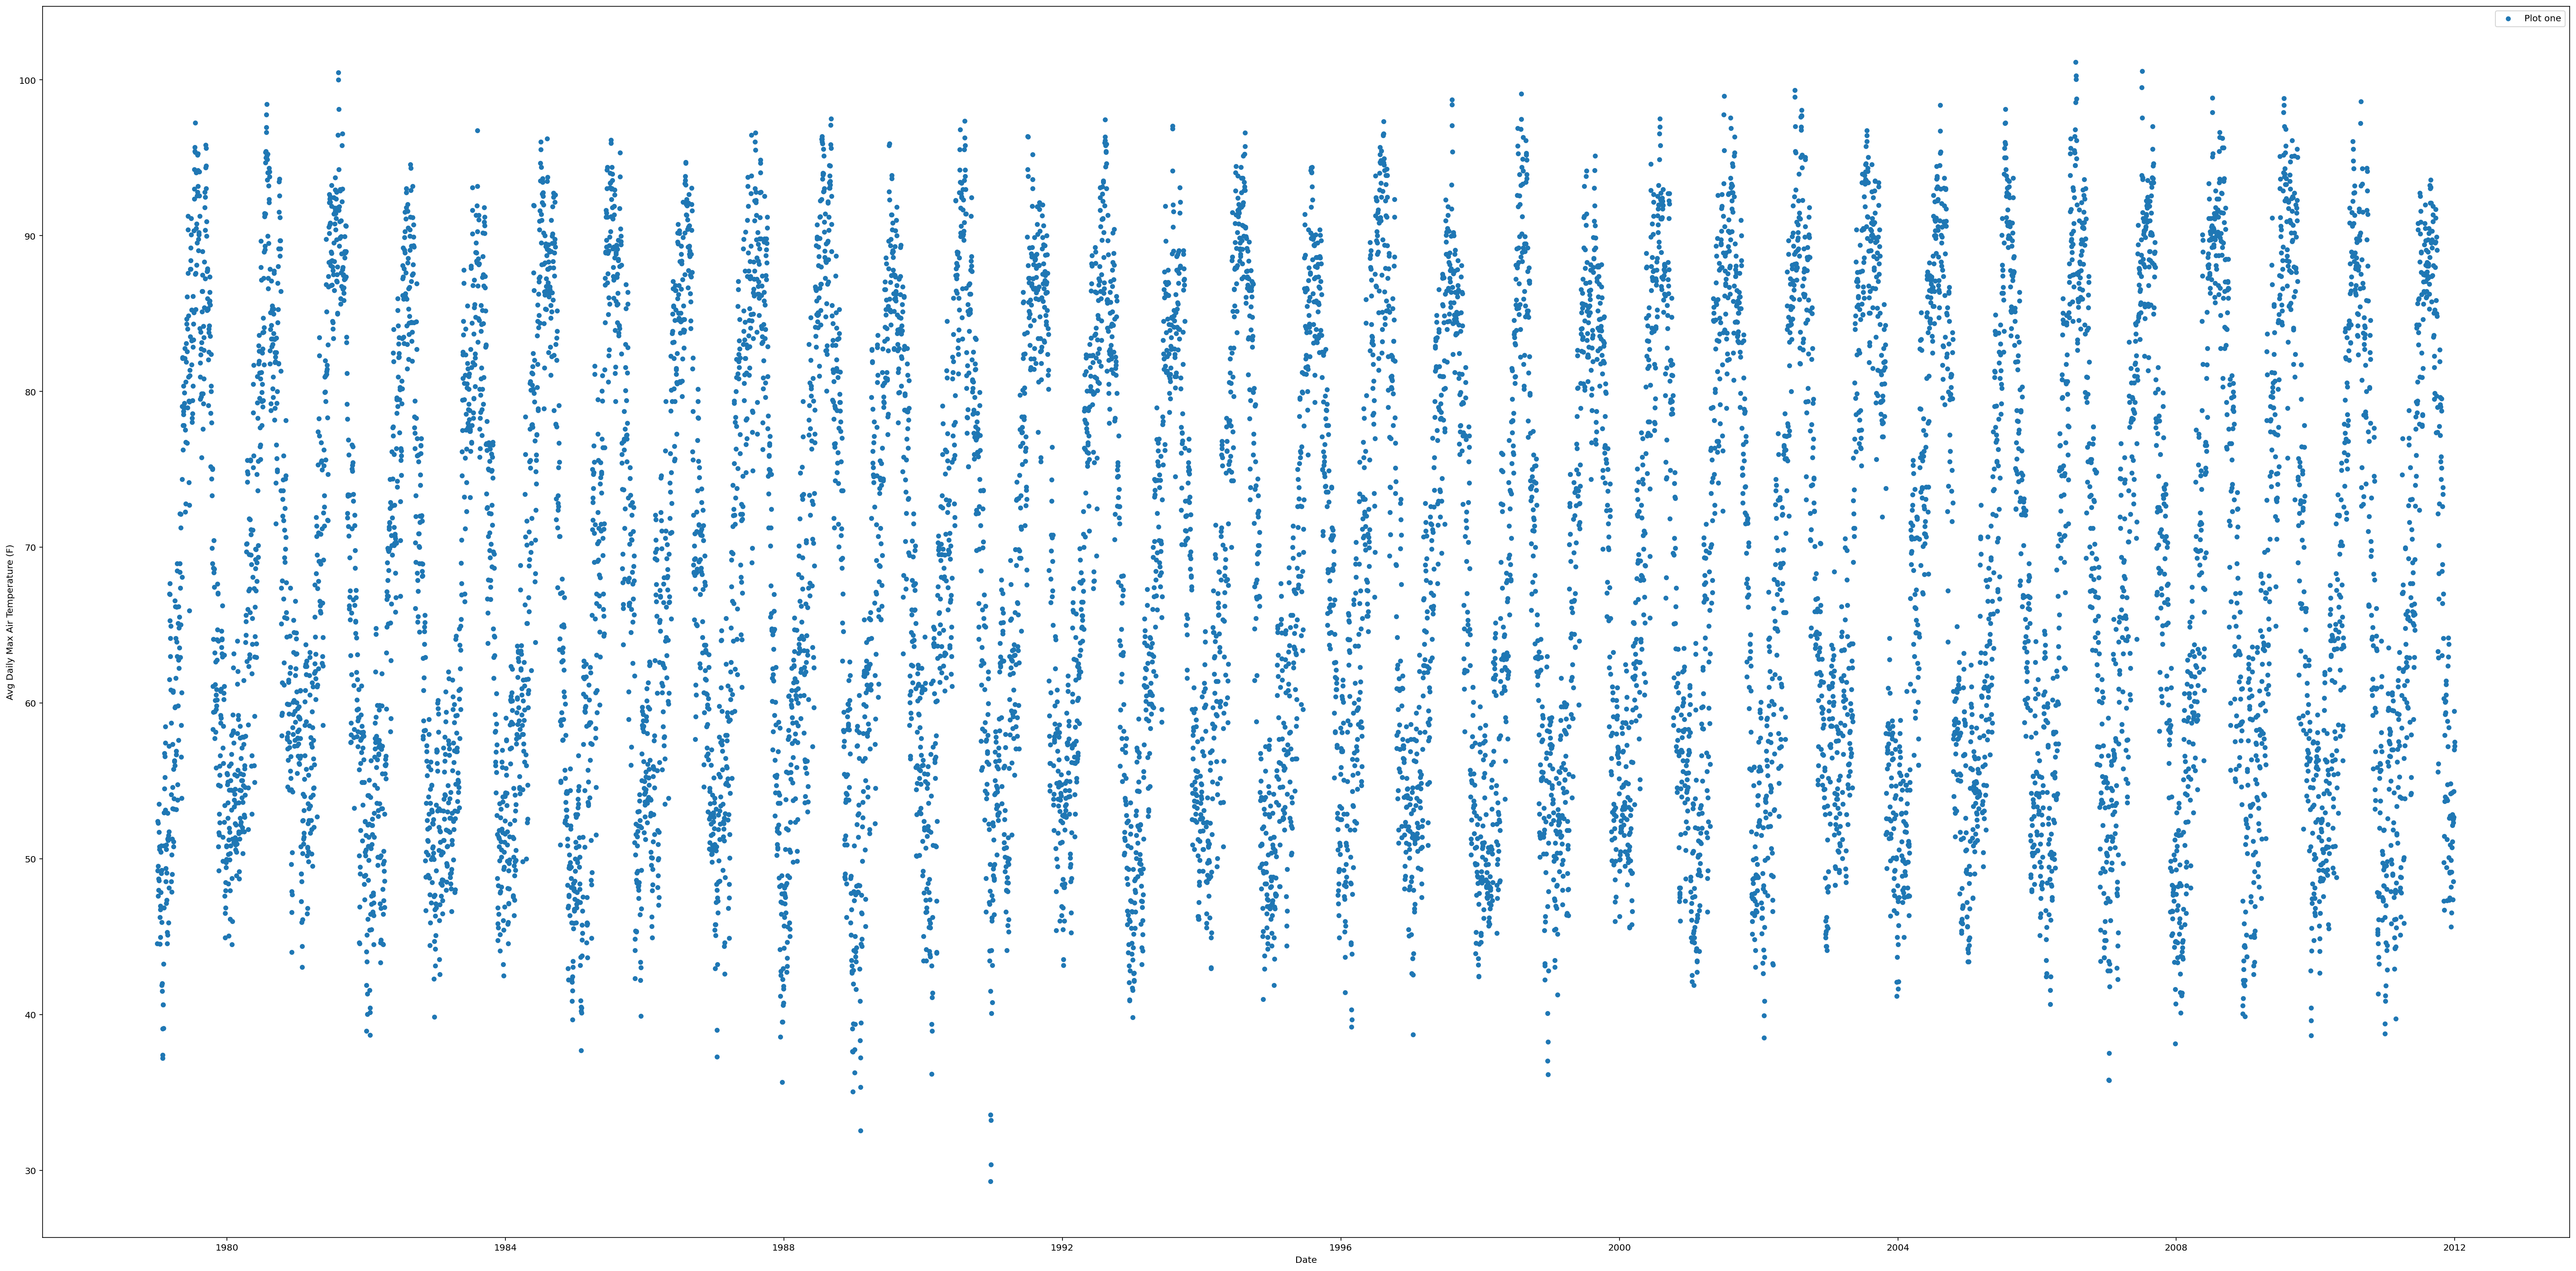

In [10]:
p1 = df[['Date','Avg Daily Max Air Temperature (F)']]
p1.plot.scatter(x='Date', y='Avg Daily Max Air Temperature (F)', label='Plot one',figsize=(50,25))

>5) Describe your plot.

In [11]:
#My plot shows that the daily max air temperature has been all over the place but tends to follow an up and down pattern as the years progress.

### Adding colors for our graph

In [12]:
# No need to edit this unless you want to try different colors or a pattern other than colors by month

cmap = matplotlib.cm.get_cmap("nipy_spectral", len(df['Month'].unique())) # Builds a discrete color mapping using a built in matplotlib color map

c = []
for i in range(cmap.N): # Converts our discrete map into Hex Values
    rgba = cmap(i)
    c.append(matplotlib.colors.rgb2hex(rgba))

df['color']=[c[int(i-1)] for i in df['Month'].astype(int)] # Adds a column to our dataframe with the color we want for each row

/tmp/ipykernel_18670/2382980842.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['color']=[c[int(i-1)] for i in df['Month'].astype(int)] # Adds a column to our dataframe with the color we want for each row


>6) Make the same plot as 4) but add color by adding the argument c=df\['color'\] to our plotting command.

<AxesSubplot:xlabel='Date', ylabel='Avg Daily Max Air Temperature (F)'>

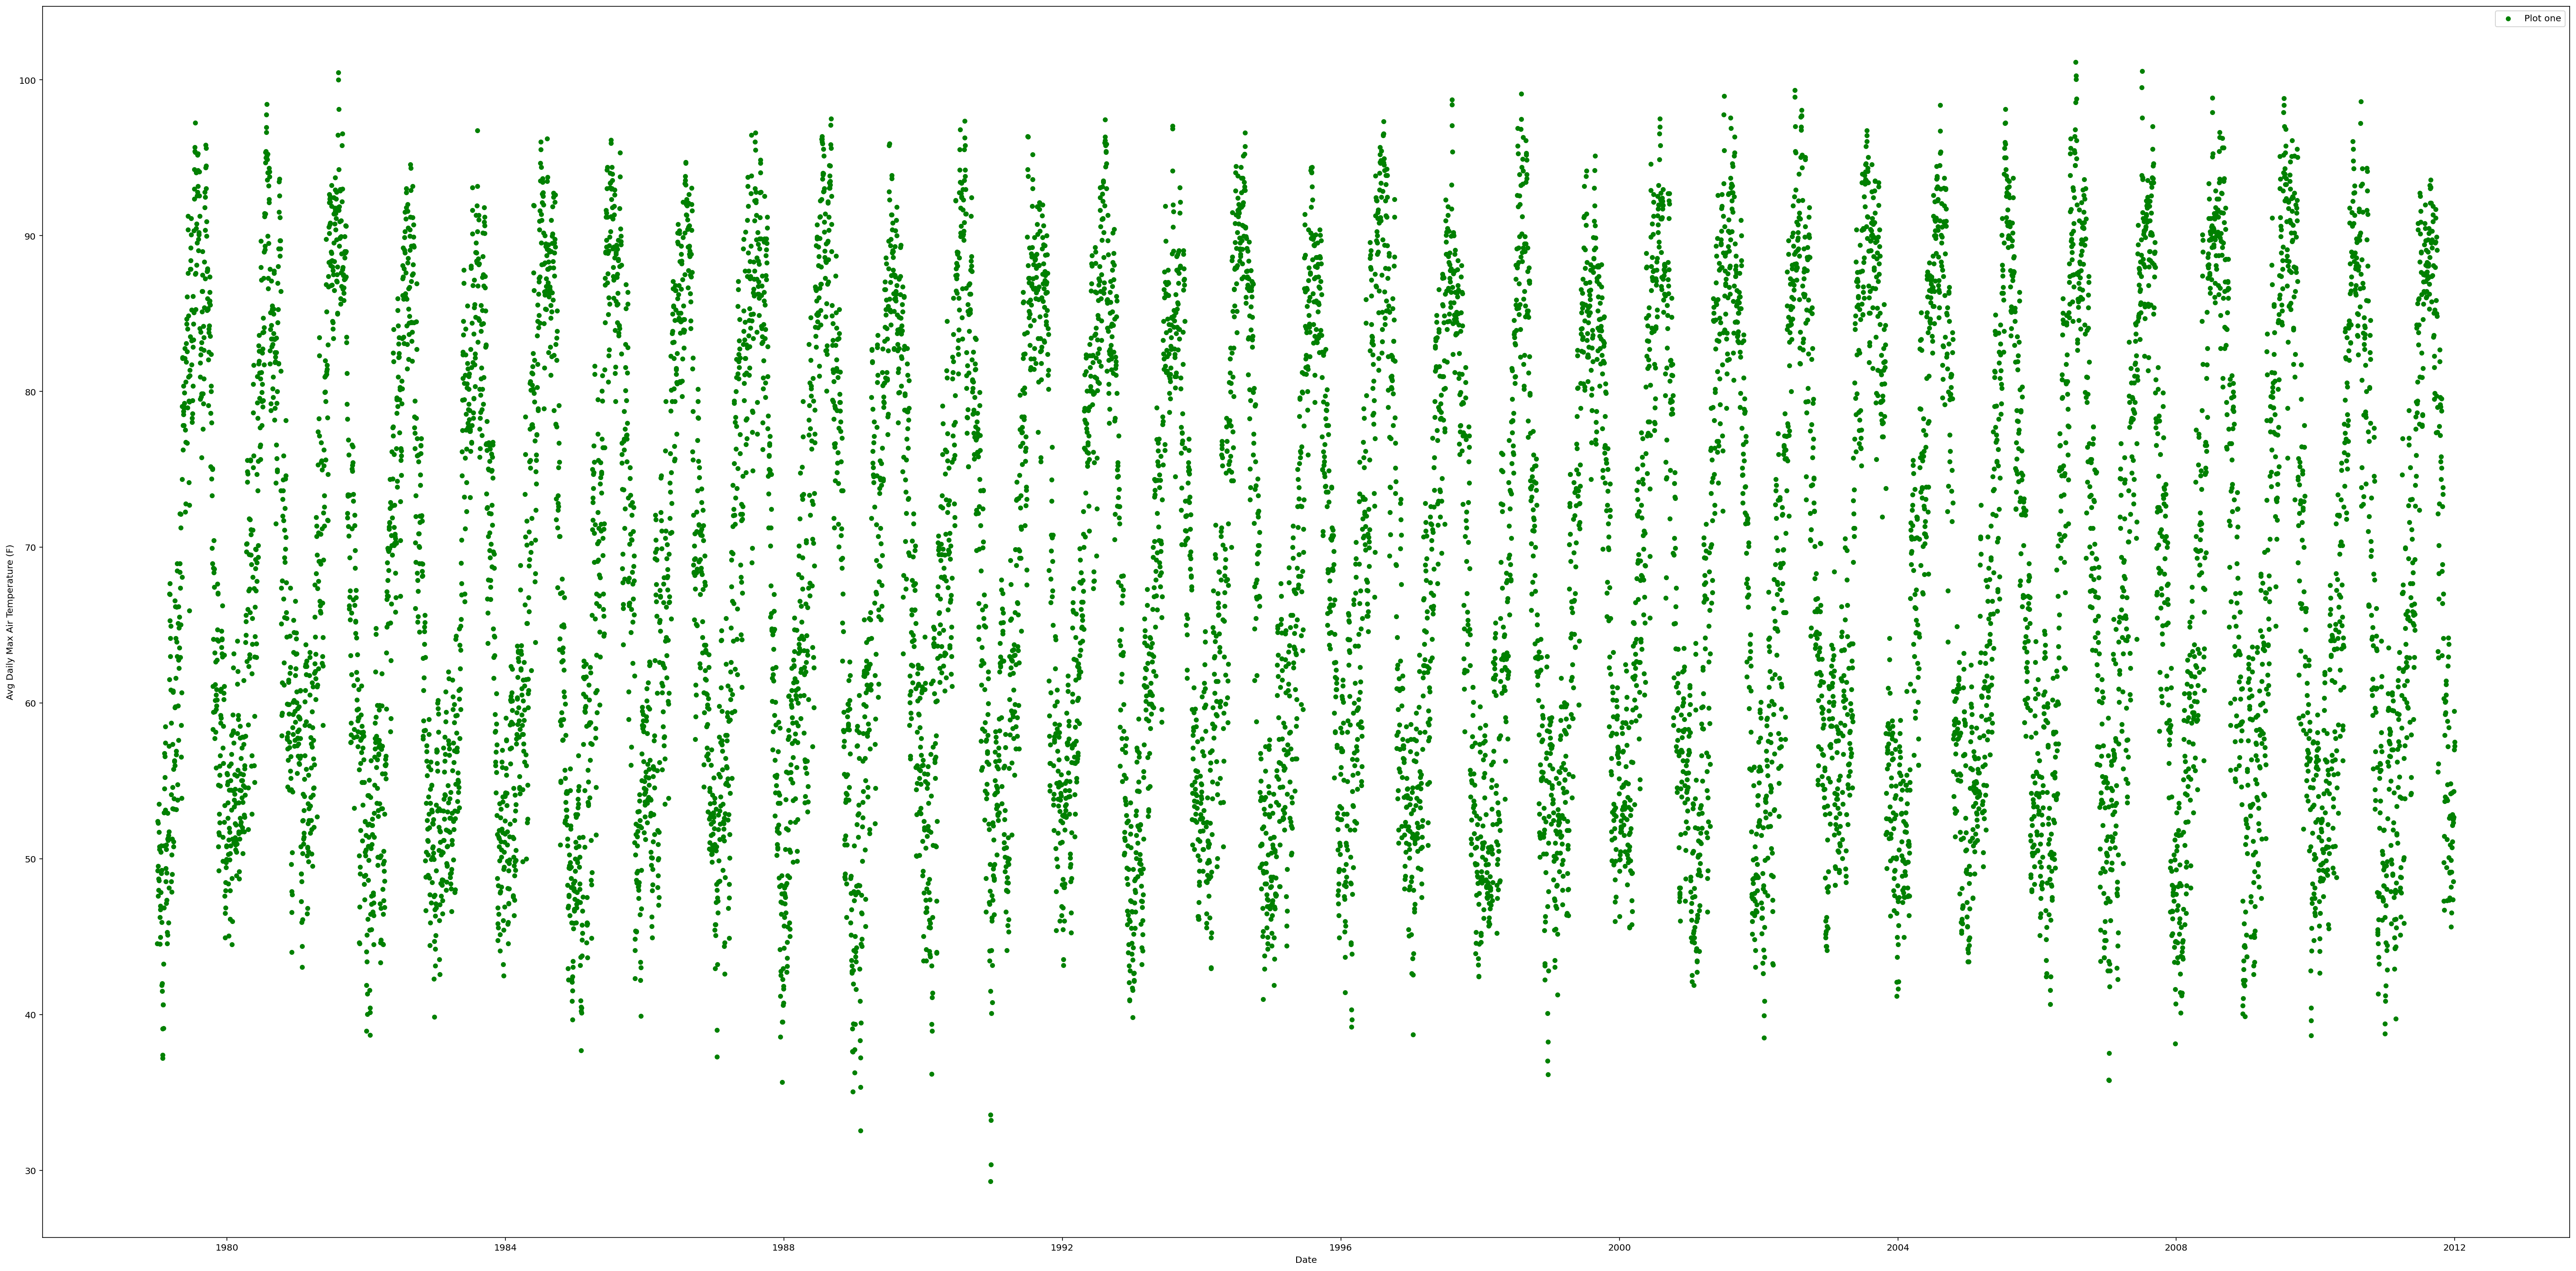

In [13]:
p1 = df[['Date','Avg Daily Max Air Temperature (F)']]
p1.plot.scatter(x='Date', y='Avg Daily Max Air Temperature (F)', label='Plot one', color='g',figsize=(50,25))


## Pick a subset of the data

>7) Select a 6 month period from the data. # Hint use logic and pd.datetime(YYYY, MM, DD)

In [14]:
df7 = df[df['Year'] == 2001]
month6 = df7[df7['Month'] < 7]
month6

,Notes,"Month Day, Year","Month Day, Year Code",Avg Daily Max Air Temperature (F),Date,Day,Month,Year,DateInt,color
8036,NaN,"Jan 01, 2001",2001/01/01,56.84,2001-01-01,1,1,2001,9783072.0,#000000
8037,NaN,"Jan 02, 2001",2001/01/02,59.28,2001-01-02,2,1,2001,9783936.0,#000000
8038,NaN,"Jan 03, 2001",2001/01/03,61.00,2001-01-03,3,1,2001,9784800.0,#000000
8039,NaN,"Jan 04, 2001",2001/01/04,61.15,2001-01-04,4,1,2001,9785664.0,#000000
8040,NaN,"Jan 05, 2001",2001/01/05,60.49,2001-01-05,5,1,2001,9786528.0,#000000
...,...,...,...,...,...,...,...,...,...,...
8212,NaN,"Jun 26, 2001",2001/06/26,72.33,2001-06-26,26,6,2001,9935136.0,#009c00
8213,NaN,"Jun 27, 2001",2001/06/27,76.21,2001-06-27,27,6,2001,9936000.0,#009c00
8214,NaN,"Jun 28, 2001",2001/06/28,83.79,2001-06-28,28,6,2001,9936864.0,#009c00
8215,NaN,"Jun 29, 2001",2001/06/29,88.90,2001-06-29,29,6,2001,9937728.0,#009c00


>8) Plot the subset using the the same code you used in 6). You can change the figsize if needed.

<AxesSubplot:xlabel='Date', ylabel='Avg Daily Max Air Temperature (F)'>

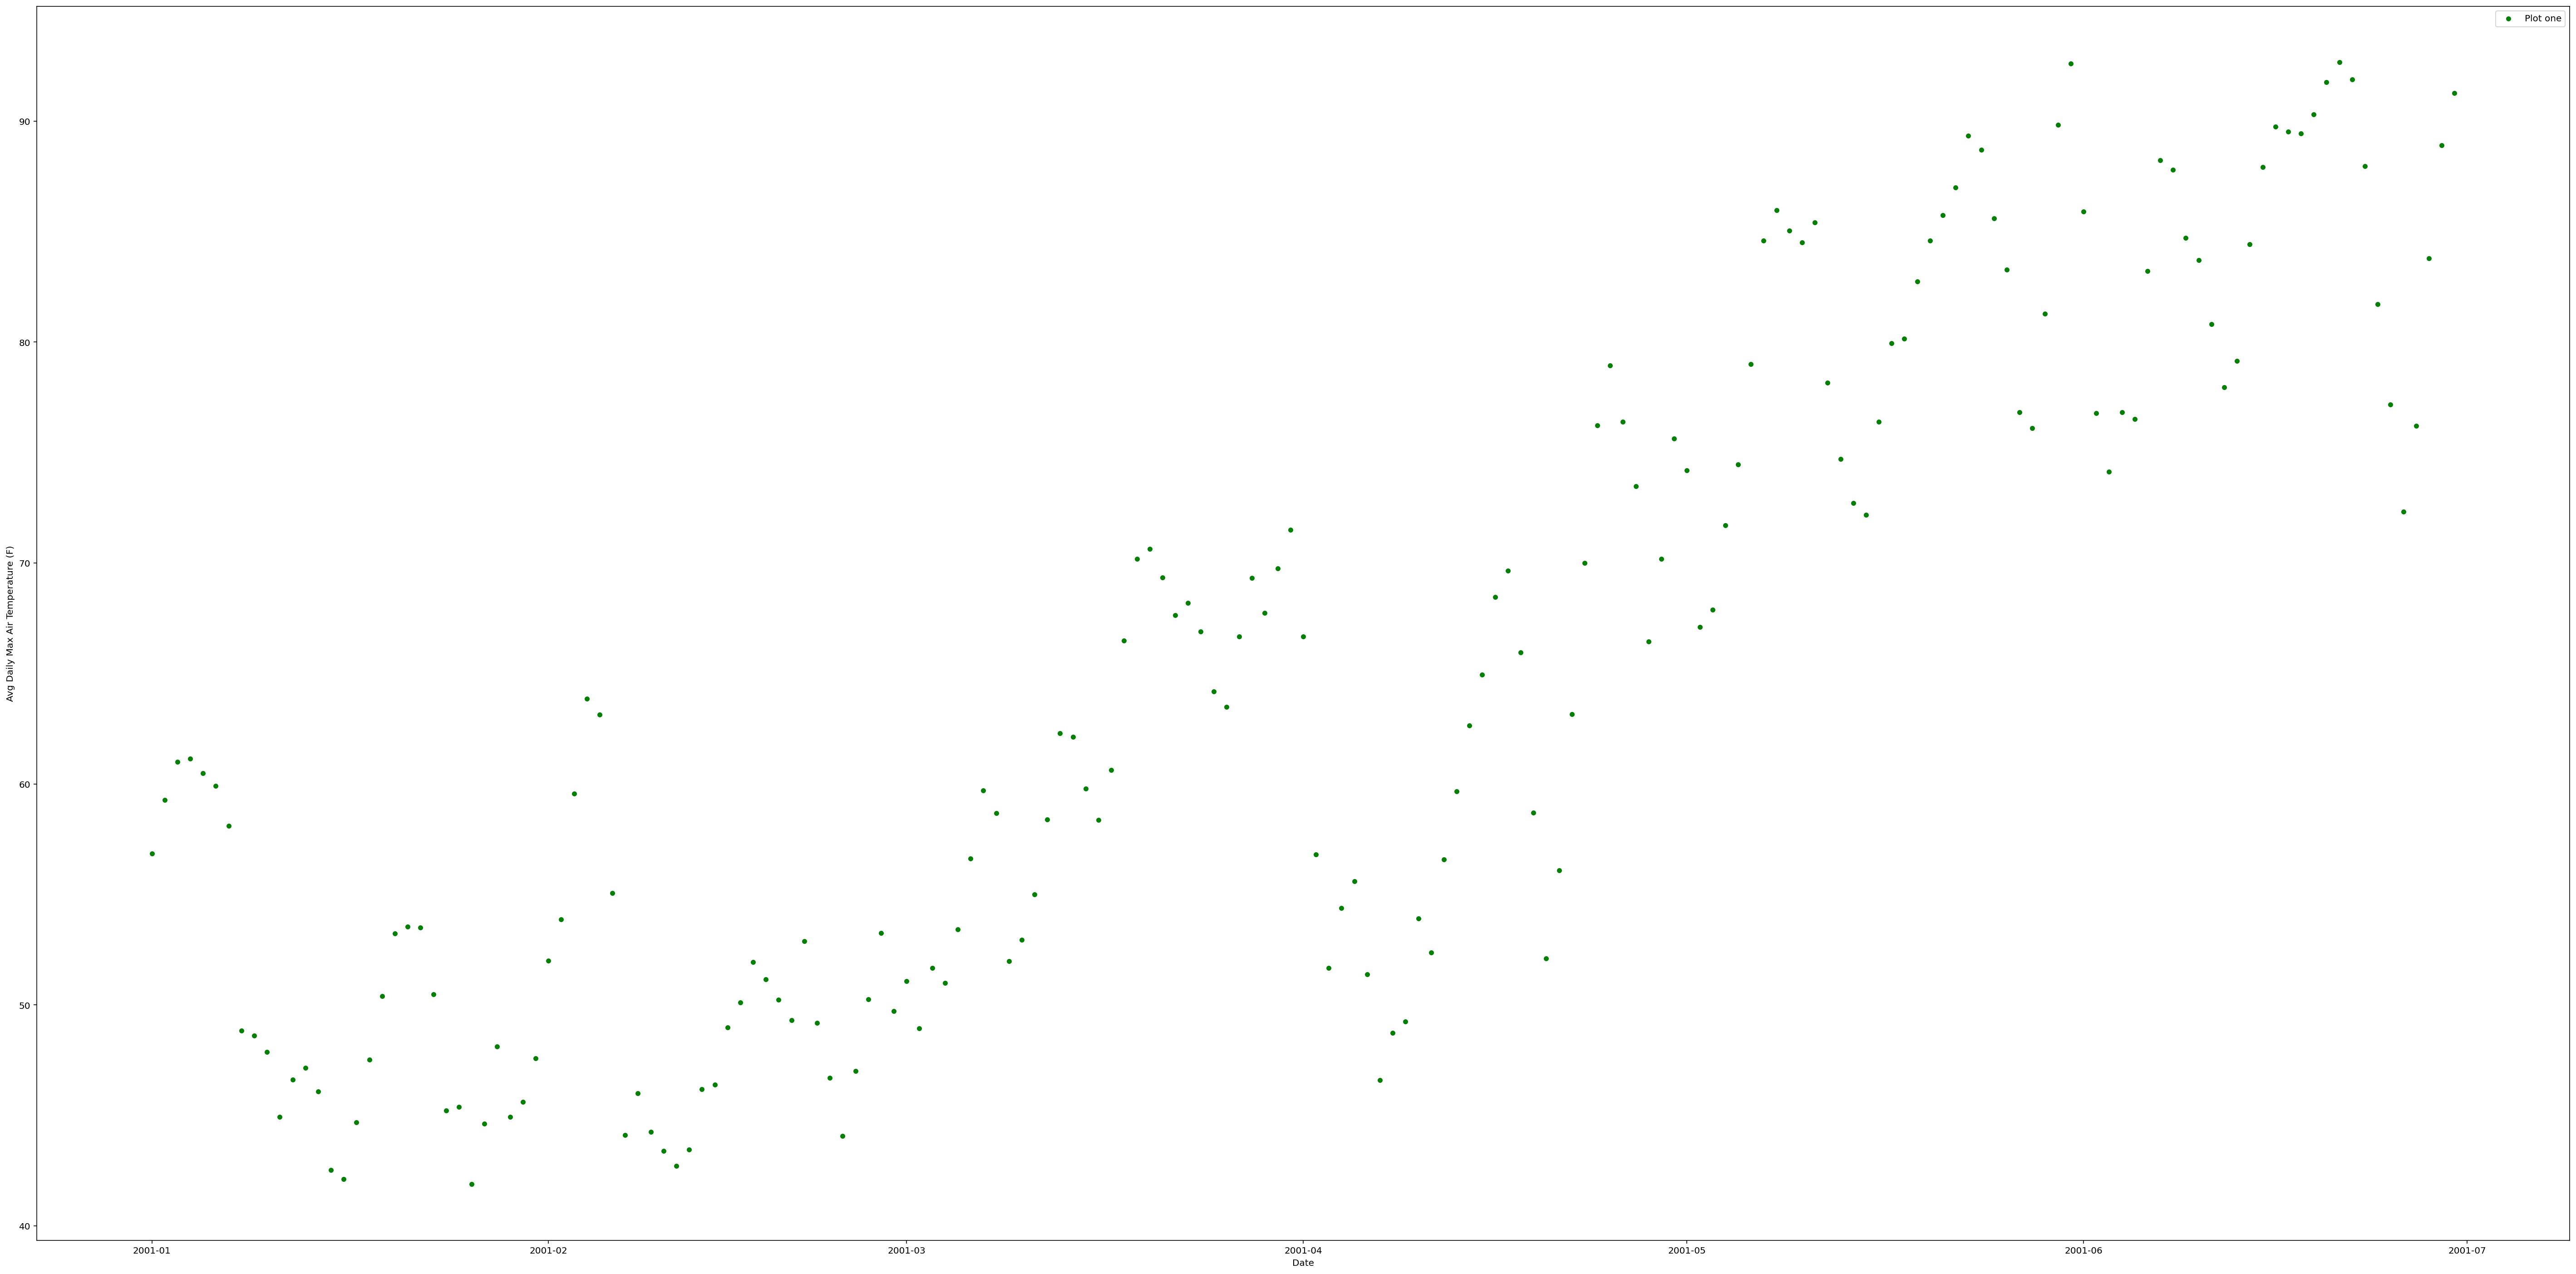

In [15]:
month6.plot.scatter(x='Date', y='Avg Daily Max Air Temperature (F)', label='Plot one', color='g',figsize=(50,25))

## Linear Regression

We are going to use a very [simple linear regression model](https://en.wikipedia.org/wiki/Simple_linear_regression). You may implement a more complex model if you wish.

The method described here is called the least squares method and is defined as:

$m = \frac{\sum_{i=1}^{n}(x_i-\bar{x})(y_i-\bar{y}))}{\sum_{i=1}^{n}(x_i-\bar{x})^2}$

$b = \bar{y} - m\bar{x}$

Where $\bar{x}$ and $\bar{y}$ are the average value of $x$ and $y$ respectively.

First we need to define our X and Y values.

In [16]:
X=month6['DateInt'].values
Y=month6['Avg Daily Max Air Temperature (F)'].values

In [17]:
def lin_reg(x,y):
    # Calculate the average x and y
    x_avg = np.mean(x)
    y_avg = np.mean(y)

    num = 0
    den = 0
    for i in range(len(x)): # This represents our sums
        num = num + (x[i] - x_avg)*(y[i] - y_avg) # Our numerator
        den = den + (x[i] - x_avg)**2 # Our denominator
    # Calculate slope
    m = num / den
    # Calculate intercept
    b = y_avg - m*x_avg

    print (m, b)
    
    # Calculate our predicted y values
    y_pred = m*x + b
    
    return y_pred

In [18]:
Y_pred = lin_reg(X,Y)

0.0002879827227202916 -2774.9717890838424


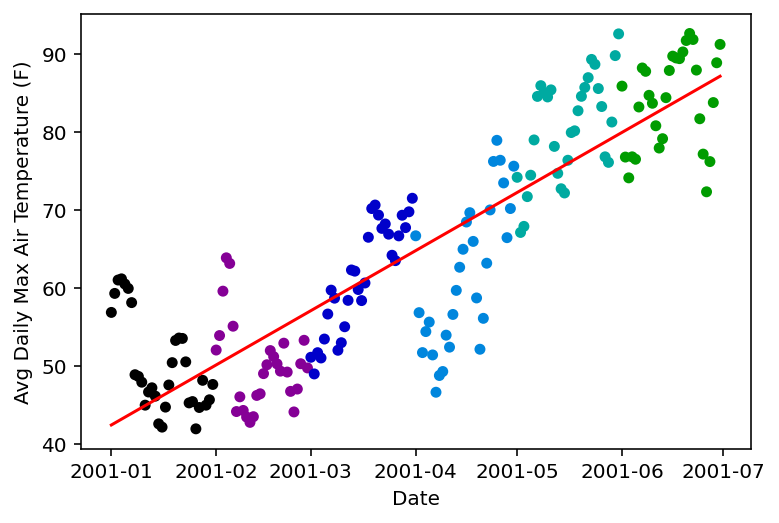

In [21]:
month6.plot.scatter(x='Date', y='Avg Daily Max Air Temperature (F)',c=month6['color'])
plt.plot([min(month6['Date'].values), max(month6['Date'].values)], [min(Y_pred), max(Y_pred)], color='red') 
plt.show()

>9) What are the slope and intercept of your best fit line?

In [ ]:
#slope = .002879827227202916
#intercept = -2774.9717890838424

>10) What are the minimum and maximum Y values of your best fit line? Is your slope positive or negative?

In [22]:
print(min(Y_pred))
print(max(Y_pred))

42.38392204480624
87.17099508226602


## Putting it all together

>11) Generate a best fit line for the full data set and plot the line over top of the data.

In [23]:
xFull=df['DateInt'].values
yfull=df['Avg Daily Max Air Temperature (F)'].values

In [30]:
Y_full = lin_reg(xFull, yfull)

1.3842841004302256e-07 67.60597761859036


In [40]:
df.plot.scatter(x='Date', y='Avg Daily Max Air Temperature (F)') , figsize = (50, 5),c=df['color])
plt.plot([min(df['Date'].values), max[df['Date'], values)], [min(Y_full). max(Y_full)], color='red')
plt.show()

SyntaxError: cannot assign to function call (2693955582.py, line 1)

>12) Is the slope positive or negative? What do you think that means?